In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans



In [15]:
# Load the data into a DataFrame
data = pd.read_excel('DATA.xlsm', sheet_name='Customer_Master')
data

D:\Anaconda\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


,STT,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,1,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,2,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,3,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,4,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,5,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,310,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane
310,311,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane
311,312,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong
312,313,14022376,Customer 855,14022376,Company 499,Account 14,91437,91314,Foodservice,National Distributor,147.383224,-35.121731,Wagga Wagga,New South Wales,Australia,NaN,Riverina


In [16]:
data.shape

(314, 17)

In [17]:
data.describe()

,STT,CustomerRef,SoldToCode,MajorAccountCode,MajorAccountCode.1,Longitude,Latitude
count,314.000000,3.140000e+02,3.140000e+02,314.000000,314.000000,314.000000,314.000000
mean,157.500000,1.214558e+07,1.184787e+07,91580.713376,91457.713376,143.243165,-31.971813
std,90.788215,1.461676e+06,1.352968e+06,1211.073168,1211.073168,11.723805,6.192220
min,1.000000,1.100013e+07,1.100013e+07,91346.000000,91223.000000,114.633660,-42.843881
25%,79.250000,1.100117e+07,1.100102e+07,91363.000000,91240.000000,142.182090,-36.076072
50%,157.500000,1.100194e+07,1.100175e+07,91363.000000,91240.000000,147.145473,-33.792050
75%,235.750000,1.400871e+07,1.400170e+07,91418.000000,91295.000000,151.058528,-27.821284
max,314.000000,1.402244e+07,1.402238e+07,99167.000000,99044.000000,153.528756,-12.427766


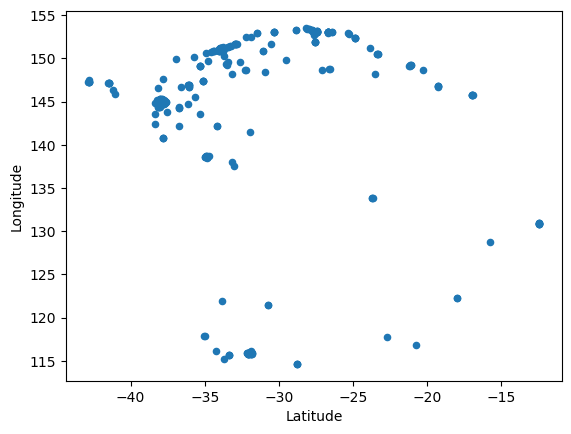

In [18]:
data.plot(kind='scatter', x='Latitude', y='Longitude')
plt.show()

In [19]:
df = data.drop(['STT'], axis = 1)
df

,CustomerRef,CustomerName,SoldToCode,SoldToName,MajorAccount,MajorAccountCode,MajorAccountCode.1,Channel,SubChannel,Longitude,Latitude,City,State,Country,SalesOrganization,Region
0,11000128,Customer 48,11000128,Company 4,Account 3,91363,91240,Foodservice,National Distributor,145.206237,-38.025962,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
1,11000144,Customer 50,11000144,Company 6,Account 4,91418,91295,Foodservice,National Distributor,144.947676,-37.728991,Moreland,Victoria,Australia,Organization 1,Greater Melbourne
2,11000149,Customer 51,11000149,Company 7,Account 3,91363,91240,Foodservice,National Distributor,152.519049,-32.197687,Great Lakes,New South Wales,Australia,Organization 1,Mid North Coast
3,11000159,Customer 52,11000159,Company 8,Account 3,91363,91240,Foodservice,National Distributor,153.122555,-27.617230,Logan,Queensland,Australia,Organization 1,Greater Brisbane
4,11000176,Customer 53,11000176,Company 9,Account 4,91418,91295,Foodservice,National Distributor,145.197119,-37.990926,Greater Dandenong,Victoria,Australia,Organization 1,Greater Melbourne
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,14021924,Customer 639,11002237,Company 211,Account 11,91379,91256,Foodservice,Global QSR Distributor,153.118374,-27.445906,Brisbane,Queensland,Australia,NaN,Greater Brisbane
310,14022011,Customer 640,14001726,Company 305,Account 3,91363,91240,Foodservice,National Distributor,153.103894,-27.425455,Brisbane,Queensland,Australia,NaN,Greater Brisbane
311,14022270,Customer 650,11000312,Company 27,Account 6,91346,91223,Foodservice,National Distributor,144.371612,-38.054289,Greater Geelong,Victoria,Australia,NaN,Ballarat & Geelong
312,14022376,Customer 855,14022376,Company 499,Account 14,91437,91314,Foodservice,National Distributor,147.383224,-35.121731,Wagga Wagga,New South Wales,Australia,NaN,Riverina


In [20]:
sc = StandardScaler()
data_stand = sc.fit_transform(df[['Longitude', 'Latitude']])
data_stand

array([[ 1.67710508e-01, -9.79263193e-01],
       [ 1.45620939e-01, -9.31227846e-01],
       [ 7.92463711e-01, -3.65352625e-02],
       [ 8.44022842e-01,  7.04356944e-01],
       [ 1.66931542e-01, -9.73596045e-01],
       [-1.05816969e+00,  3.16069867e+00],
       [-2.33413079e+00, -4.57549807e-03],
       [ 1.38913815e-01, -9.28268988e-01],
       [ 3.73522148e-01, -9.47544291e-01],
       [ 9.45309706e-02, -9.92528938e-01],
       [ 7.79246249e-01,  1.14988937e+00],
       [ 6.83609645e-01,  1.31533088e+00],
       [ 6.20155422e-01,  1.39902792e+00],
       [-4.03635142e-01, -4.62935601e-01],
       [ 3.17859438e-01, -6.58230657e-01],
       [ 7.18485070e-01,  2.35603370e-01],
       [ 8.40971092e-01,  7.30456285e-01],
       [ 2.14420001e-01,  2.42862170e+00],
       [ 5.04875758e-01, -5.41994045e-01],
       [ 6.86733816e-01, -2.33022810e-01],
       [ 8.41194917e-01,  2.63063034e-01],
       [-1.05215845e+00,  3.15574151e+00],
       [ 9.72390501e-02, -1.00478520e+00],
       [ 8.

In [21]:
data_stand = pd.DataFrame(data_stand, columns=['Longitude', 'Latitude'])
data_stand

,Longitude,Latitude
0,0.167711,-0.979263
1,0.145621,-0.931228
2,0.792464,-0.036535
3,0.844023,0.704357
4,0.166932,-0.973596
...,...,...
309,0.843666,0.732069
310,0.842429,0.735377
311,0.096406,-0.983845
312,0.353696,-0.509502


In [22]:
data_stand.describe()

,Longitude,Latitude
count,3.140000e+02,3.140000e+02
mean,-1.369039e-15,-4.327748e-16
std,1.001596e+00,1.001596e+00
min,-2.444187e+00,-1.758565e+00
25%,-9.065053e-02,-6.638670e-01
50%,3.333846e-01,-2.944247e-01
75%,6.676875e-01,6.713511e-01
max,8.787256e-01,3.161264e+00


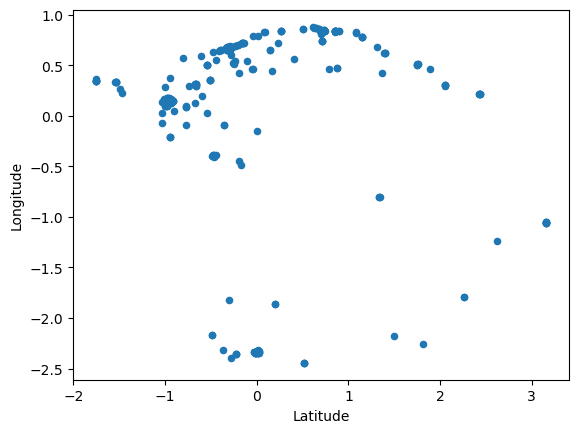

In [23]:
data_stand.plot(kind='scatter', x='Latitude', y='Longitude')
plt.show()

In [26]:
import matplotlib.pyplot as plt

# Tính toán Số lượng bình phương khoảng cách cho các giá trị k
Sum_of_squared_distances = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(data_stand)
    Sum_of_squared_distances.append(kmeans.inertia_)




D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

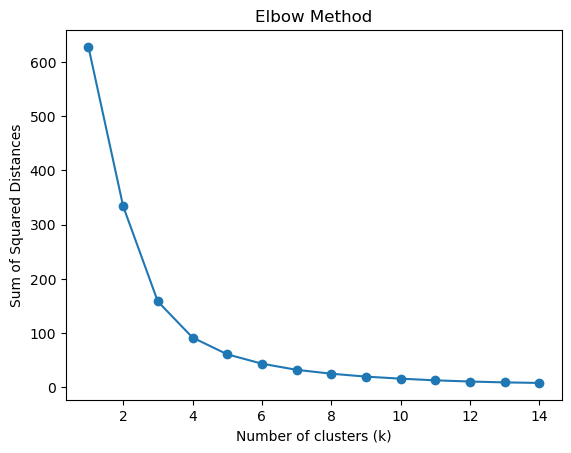

In [27]:
# Vẽ biểu đồ elbow
plt.plot(range(1, 15), Sum_of_squared_distances, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.show()